# MOXSI Full-disk Simulations

This is a visualization of the full-disk observation as derived from a DEM from both XRT and AIA in all seven orders.
This is mainly for the purposes of showing what MOXSI data will look like

In [39]:
import pathlib

import aiapy
import astropy.time
import astropy.units as u
from astropy.visualization import LogStretch, ImageNormalize, AsymmetricPercentileInterval
import distributed
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from overlappy.io import write_overlappogram
from overlappy.util import color_lat_lon_axes
import sunpy.map

from mocksipipeline.physics.dem.data_prep import DataQuery, DataPrep
from mocksipipeline.physics.spectral import SpectralModel
from mocksipipeline.detector.component import DispersedComponent, DetectorComponent, sample_and_remap_spectral_cube
from mocksipipeline.detector.response import Channel, SpectrogramChannel
from mocksipipeline.util import stack_components

In [2]:
correction_table = aiapy.calibrate.util.get_correction_table() 
error_table = aiapy.calibrate.util.get_error_table()
temperature_bin_edges = 10**np.arange(5.5, 7.6, 0.1) * u.K
data_dir = pathlib.Path('../data/')

/Users/wtbarnes/mambaforge/envs/mocksipipeline/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 1 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/Users/wtbarnes/mambaforge/envs/mocksipipeline/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/Users/wtbarnes/mambaforge/envs/mocksipipeline/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "dtf2d" yielded 100 of "dubious year (Note 6)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/Users/wtbarnes/mambaforge/envs/mocksipipeline/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "dtf2d" yielded 10 of "dubious year (Note 6)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


In [3]:
spec_model = SpectralModel()

In [4]:
filtergram_channels = [Channel(f'filtergram_{i}') for i in range(1,5)]
dispersed_channels = [SpectrogramChannel(o) for o in range(-4,5)]

In [5]:
client = distributed.Client()

In [6]:
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 5
Total threads: 10,Total memory: 64.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:61120,Workers: 5
Dashboard: http://127.0.0.1:8787/status,Total threads: 10
Started: Just now,Total memory: 64.00 GiB
Comm: tcp://127.0.0.1:61137,Total threads: 2
Dashboard: http://127.0.0.1:61139/status,Memory: 12.80 GiB
Nanny: tcp://127.0.0.1:61123,


## AR Case

In [7]:
ar_time = astropy.time.Time('2020-11-09 18:00:00')
pointing_table_ar = aiapy.calibrate.util.get_pointing_table(ar_time-6*u.h, ar_time+6*u.h)
ar_dir = data_dir / 'observations' / f'ar_{ar_time.isot}'

In [8]:
dq_ar = DataPrep(map_list=sunpy.map.Map(list((ar_dir / 'AIA').glob('*.fits')) + list((ar_dir / 'XRT').glob('*.fits'))),
                 aia_error_table=error_table,
                 aia_correction_table=correction_table,
                 aia_pointing_table=pointing_table_ar,
                 temperature_bin_edges=temperature_bin_edges)

In [9]:
dem_cube_ar = dq_ar.run()

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1.74k/1.74k [01:27<00:00, 19.9 x10^2 DEM/s]


In [10]:
spec_cube_ar = spec_model.run(dem_cube_ar, dq_ar.celestial_wcs)

In [15]:
dispersed_components_ar = {
    channel.spectral_order: sample_and_remap_spectral_cube(spec_cube_ar, channel, dt=1*u.min, interval=1*u.h)
    for channel in dispersed_channels
}

/Users/wtbarnes/mambaforge/envs/mocksipipeline/lib/python3.9/site-packages/astropy/units/quantity.py:673: RuntimeWarning: divide by zero encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/wtbarnes/mambaforge/envs/mocksipipeline/lib/python3.9/site-packages/astropy/units/quantity.py:673: RuntimeWarning: divide by zero encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
  'angstrom' -> 'Angstrom'. [astropy.wcs.wcs]
/Users/wtbarnes/mambaforge/envs/mocksipipeline/lib/python3.9/site-packages/astropy/units/quantity.py:673: RuntimeWarning: divide by zero encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
  'angstrom' -> 'Angstrom'. [astropy.wcs.wcs]
/Users/wtbarnes/mambaforge/envs/mocksipipeline/lib/python3.9/site-packages/astropy/units/quantity.py:673: RuntimeWarning: divide by zero encountered in divide
  result = super().__array_ufunc__(function, method, *ar

In [16]:
filtergram_components_ar = {
    channel.name: sample_and_remap_spectral_cube(spec_cube_ar, channel, dt=1*u.min, interval=1*u.h)
    for channel in filtergram_channels
}

/Users/wtbarnes/mambaforge/envs/mocksipipeline/lib/python3.9/site-packages/astropy/units/quantity.py:673: RuntimeWarning: divide by zero encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
  'angstrom' -> 'Angstrom'. [astropy.wcs.wcs]
/Users/wtbarnes/mambaforge/envs/mocksipipeline/lib/python3.9/site-packages/astropy/units/quantity.py:673: RuntimeWarning: divide by zero encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
  'angstrom' -> 'Angstrom'. [astropy.wcs.wcs]
/Users/wtbarnes/mambaforge/envs/mocksipipeline/lib/python3.9/site-packages/astropy/units/quantity.py:673: RuntimeWarning: divide by zero encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
  'angstrom' -> 'Angstrom'. [astropy.wcs.wcs]
/Users/wtbarnes/mambaforge/envs/mocksipipeline/lib/python3.9/site-packages/astropy/units/quantity.py:673: RuntimeWarning: divide by zero encountered in divide
  result =

In [70]:
total_overlappogram = stack_components(
    [v for k,v in {**dispersed_components_flare, **filtergram_components_flare}.items()],
wcs_index=4)

In [62]:
i_wave = 0#np.argmin(np.fabs(wave - 22*u.AA))

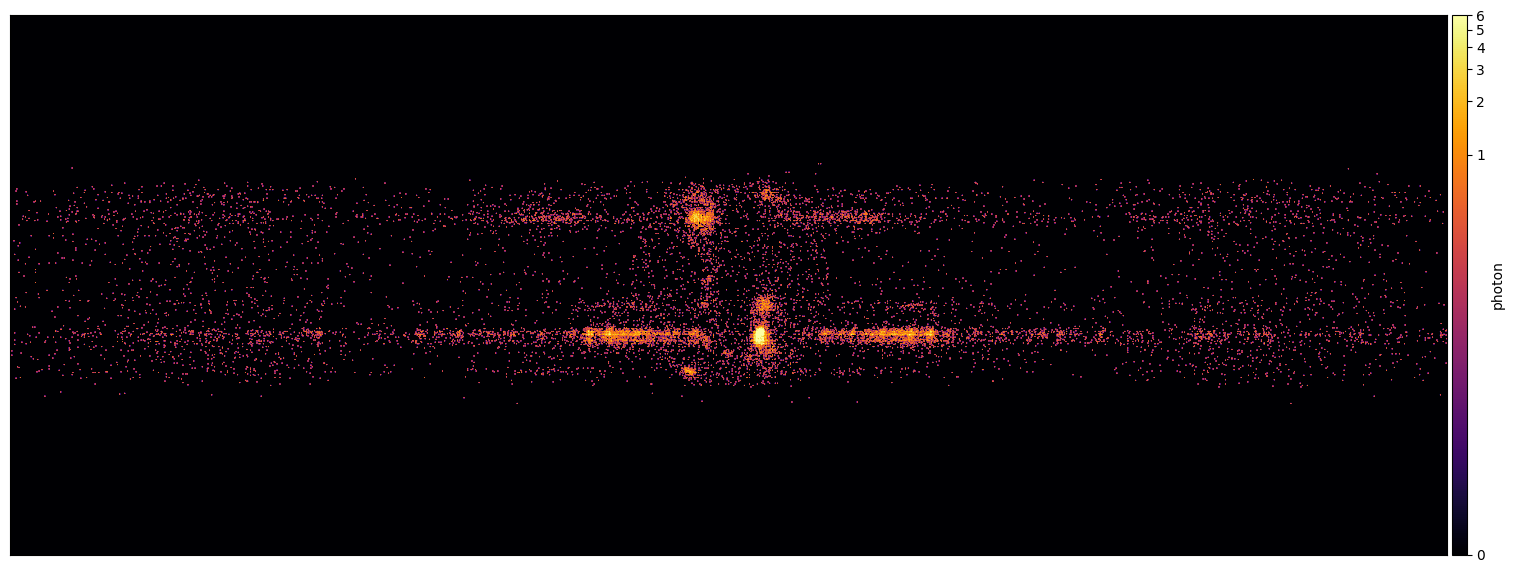

In [73]:
fig = plt.figure(figsize=(20,7))
sl = np.s_[0,:750,:]
vmin,vmax = AsymmetricPercentileInterval(1,99.99).get_limits(total_overlappogram[sl].data)
#vmin,vmax = None, None
norm = ImageNormalize(vmin=vmin, vmax=vmax,stretch=LogStretch())
ax = fig.add_subplot(projection=total_overlappogram[sl].wcs)
total_overlappogram[sl].plot(
    axes=ax,
    norm=norm,
    data_unit='photon',
    cmap='inferno',
)
for c in ax.coords:
    c.set_ticks_visible(False)
    c.set_ticklabel_visible(False)
#color_lat_lon_axes(ax)
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='1%', pad=0.05, axes_class=matplotlib.axes.Axes)
cbar = fig.colorbar(ax.get_images()[0], cax=cax, orientation='vertical')
cax.yaxis.set_ticks_position("right")
cbar.set_label('photon')
#fig.savefig('/Users/wtbarnes/Desktop/moxsi-overlappogram-flare.pdf', bbox_inches='tight')

In [19]:
for k,v in dispersed_components_ar.items():
    write_overlappogram(v, ar_dir / 'overlappograms_full_disk_sampled' / f'overlappogram-order{k}.fits')

In [20]:
for k,v in filtergram_components_ar.items():
    write_overlappogram(v, ar_dir / 'filtergrams_full_disk_sampled' / f'{k}.fits')

## Flare

In [11]:
flare_time = astropy.time.Time('2022-03-30T17:55')
pointing_table_flare = aiapy.calibrate.util.get_pointing_table(flare_time-6*u.h, flare_time+6*u.h)
flare_dir = data_dir / 'observations' / f'flare_{flare_time.isot}'

In [12]:
dq_flare = DataPrep(map_list=sunpy.map.Map(list((flare_dir / 'AIA').glob('*.fits')) + list((flare_dir / 'XRT').glob('*.fits'))),
                    aia_error_table=error_table,
                    aia_correction_table=correction_table,
                    aia_pointing_table=pointing_table_flare,
                    temperature_bin_edges=temperature_bin_edges)

In [13]:
dem_cube_flare = dq_flare.run()

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1.74k/1.74k [01:29<00:00, 19.5 x10^2 DEM/s]


In [14]:
spec_cube_flare = spec_model.run(dem_cube_flare, dq_flare.celestial_wcs)

In [66]:
dispersed_components_flare = {
    channel.spectral_order: sample_and_remap_spectral_cube(spec_cube_flare, channel, dt=1*u.s, interval=1*u.minute)
    for channel in dispersed_channels
}

/Users/wtbarnes/mambaforge/envs/mocksipipeline/lib/python3.9/site-packages/astropy/units/quantity.py:673: RuntimeWarning: divide by zero encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
  'angstrom' -> 'Angstrom'. [astropy.wcs.wcs]
/Users/wtbarnes/mambaforge/envs/mocksipipeline/lib/python3.9/site-packages/astropy/units/quantity.py:673: RuntimeWarning: divide by zero encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
  'angstrom' -> 'Angstrom'. [astropy.wcs.wcs]
/Users/wtbarnes/mambaforge/envs/mocksipipeline/lib/python3.9/site-packages/astropy/units/quantity.py:673: RuntimeWarning: divide by zero encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
  'angstrom' -> 'Angstrom'. [astropy.wcs.wcs]
/Users/wtbarnes/mambaforge/envs/mocksipipeline/lib/python3.9/site-packages/astropy/units/quantity.py:673: RuntimeWarning: divide by zero encountered in divide
  result =

In [67]:
filtergram_components_flare = {
    channel.name: sample_and_remap_spectral_cube(spec_cube_flare, channel, dt=1*u.s, interval=1*u.minute)
    for channel in filtergram_channels
}

/Users/wtbarnes/mambaforge/envs/mocksipipeline/lib/python3.9/site-packages/astropy/units/quantity.py:673: RuntimeWarning: divide by zero encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
  'angstrom' -> 'Angstrom'. [astropy.wcs.wcs]
/Users/wtbarnes/mambaforge/envs/mocksipipeline/lib/python3.9/site-packages/astropy/units/quantity.py:673: RuntimeWarning: divide by zero encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
  'angstrom' -> 'Angstrom'. [astropy.wcs.wcs]
/Users/wtbarnes/mambaforge/envs/mocksipipeline/lib/python3.9/site-packages/astropy/units/quantity.py:673: RuntimeWarning: divide by zero encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
  'angstrom' -> 'Angstrom'. [astropy.wcs.wcs]
/Users/wtbarnes/mambaforge/envs/mocksipipeline/lib/python3.9/site-packages/astropy/units/quantity.py:673: RuntimeWarning: divide by zero encountered in divide
  result =

In [21]:
for k,v in dispersed_components_flare.items():
    write_overlappogram(v, flare_dir / 'overlappograms_full_disk_sampled' / f'overlappogram-order{k}.fits')

In [22]:
for k,v in filtergram_components_flare.items():
    write_overlappogram(v, flare_dir / 'filtergrams_full_disk_sampled' / f'{k}.fits')

## Sandbox

In [12]:
dc = DispersedComponent()

In [18]:
dispersed_components = dc.compute(spec_cube, electrons=False)

/Users/wtbarnes/mambaforge/envs/mocksipipeline/lib/python3.9/site-packages/astropy/units/quantity.py:673: RuntimeWarning: divide by zero encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
  'angstrom' -> 'Angstrom'. [astropy.wcs.wcs]
/Users/wtbarnes/mambaforge/envs/mocksipipeline/lib/python3.9/site-packages/astropy/units/quantity.py:673: RuntimeWarning: divide by zero encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
  'angstrom' -> 'Angstrom'. [astropy.wcs.wcs]
/Users/wtbarnes/mambaforge/envs/mocksipipeline/lib/python3.9/site-packages/astropy/units/quantity.py:673: RuntimeWarning: divide by zero encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
  'angstrom' -> 'Angstrom'. [astropy.wcs.wcs]
/Users/wtbarnes/mambaforge/envs/mocksipipeline/lib/python3.9/site-packages/astropy/units/quantity.py:673: RuntimeWarning: divide by zero encountered in divide
  result =

In [ ]:
fc = FiltergramComponent()

In [ ]:
filtergram_components = fc.compute(spec_cube)